# Chapter 3: Undirected graphs

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

**Raúl Pérez-Fernández**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import voronoi_plot_2d, Voronoi
import numpy as np
%matplotlib inline

## Some essential data structures in python

Using the correct datastructure is key to implementing an efficient graph algorithm. Below is a concise overview of some elementary python data structures.

For more information on the time complexity of operations on these data structures, see [this](https://wiki.python.org/moin/TimeComplexity) link.

### Lists: ordered  collection of objects

Lists store objects in sequential order. Adding and removing elements at the back is easy, inserting or removing elements elsewhere is computationally inefficient (memory has to be reshuffled).

In [2]:
my_list = [1, 2, 3, 4, 5]

In [3]:
my_list.append(6)  # add element at the back
my_list

[1, 2, 3, 4, 5, 6]

In [4]:
my_list.pop()  # return last element

6

In [5]:
my_list  # element is gone

[1, 2, 3, 4, 5]

In [6]:
my_list[4]  # take element

5

In [7]:
my_list[3] = 'three'  # replace
my_list

[1, 2, 3, 'three', 5]

In [8]:
# for loops in lists
squares = [x**2 for x in range(1, 11)]
squares

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [9]:
# a more complex example
squares_odd = [x**2 for x in range(1, 11) if x%2==1]
squares_odd

[1, 9, 25, 49, 81]

### Sets: unordened collection of objects

Sets have no ordening and cannot contain duplicates. It is very efficient (constant time compelxity) to check if an element is present and to add or remove an object.

In [10]:
numbers = set([1, 2, 15, -1, 4, 2, 3, 4])  # make set from list 
numbers  # no particular order or duplicates

{-1, 1, 2, 3, 4, 15}

In [11]:
5 in numbers  # check if element is member

False

In [12]:
numbers.add(5)  # add element

In [13]:
5 in numbers

True

In [14]:
# set operations on two sets
new_numbers = set([2, 15, -1, 8, 6, 15])
new_numbers

{-1, 2, 6, 8, 15}

In [15]:
numbers & new_numbers  # intersection (AND)

{-1, 2, 15}

In [16]:
numbers | new_numbers  # union (OR)

{-1, 1, 2, 3, 4, 5, 6, 8, 15}

In [17]:
numbers - new_numbers  # set difference (in first but not in second)

{1, 3, 4, 5}

## Dictionary: key-value storage

Dictionaries are the best of both lists and sets, they store values by a key

In [18]:
my_dict = {'A' : 1, 'B' : 'bee', 'C' : [1, 2, 3]}  # make dictionary

In [19]:
my_dict['B']  # get value associated by key

'bee'

In [20]:
my_dict['D'] = 'new value'  # add new key-value
my_dict

{'A': 1, 'B': 'bee', 'C': [1, 2, 3], 'D': 'new value'}

In [21]:
'A' in my_dict  # check if dict has key: similar to set, very efficient

True

In [22]:
for k, v in my_dict.items():  # iterate over values
    print(k, v)

C [1, 2, 3]
B bee
D new value
A 1


In [23]:
for k in my_dict.keys():  # iterate over keys
    print(k)

C
B
D
A


In [24]:
for v in my_dict.values():  # iterate over values
    print(v)

[1, 2, 3]
bee
new value
1


## Representing graphs in python

Consider the following example graph:

Typically, graphs are represented as:
- **list of edges**: a set of edges (tuples of vertices) we use sets as there is no order in the edges. THis is the prefered format to *store* graphs.
- **adjacency lists**: in python implemented as dictionaries. Each vertex is a key and the associated value is a set of neighboring edges (for undirected graphs every outgoing edge should be balanced by an ingoing edge).
- **adjacenty matrices**: matrix of which the elements store the edges. Is only used for dense graphs.

Example of the theory:

![](Figures/undir_graph.png)

In [2]:
edges = set([('A', 'B'), ('B', 'C'), ('C', 'D'), ('A', 'D'), ('C', 'E'), ('D', 'E')])

In [3]:
from graphs import edges_to_adj_list

In [27]:
adj_list = edges_to_adj_list(edges)
adj_list

{'A': {'B', 'D'},
 'B': {'A', 'C'},
 'C': {'B', 'D', 'E'},
 'D': {'A', 'C', 'E'},
 'E': {'C', 'D'}}

Some basic graph algorithms are implemented:
- `give_connected_component`: gives the connected component for a vertex
- `is_connected`: checks if a graph is connected (every edge can be reached from every other edge)
- `has_path`: checks if there exists a path between two vertices
- `is_bridge`: checks if an edge is a bridge (i.e. removing it makes the graph disconnected

Run the examples and check the result

In [4]:
from graphs import give_connected_component, is_connected, is_bridge, has_path

In [29]:
example1_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'C'), ('D', 'E'),
                     ('E', 'F'), ('F', 'G'), ('G', 'E'), ('D', 'F'),('C','F')
                     ])
example2_edges = set([('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'),
                     ('D', 'G'), ('F', 'G'), ('G', 'E'), ('D', 'F')
                     ])

In [30]:
example1_adj_list = edges_to_adj_list(example1_edges)
example2_adj_list = edges_to_adj_list(example2_edges)

In [31]:
example1_adj_list

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'F'},
 'D': {'C', 'E', 'F'},
 'E': {'D', 'F', 'G'},
 'F': {'C', 'D', 'E', 'G'},
 'G': {'E', 'F'}}

In [32]:
give_connected_component(example1_adj_list, 'A')

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [33]:
give_connected_component(example2_adj_list, 'A')

{'A', 'B', 'C'}

In [34]:
is_connected(example1_adj_list)

True

In [35]:
is_connected(example2_adj_list)

False

In [36]:
is_bridge(example1_adj_list, ('A', 'B'))

False

In [37]:
is_bridge(example1_adj_list, ('C', 'D'))

False

In [38]:
example1_adj_list

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'F'},
 'D': {'C', 'E', 'F'},
 'E': {'D', 'F', 'G'},
 'F': {'C', 'D', 'E', 'G'},
 'G': {'E', 'F'}}

In [39]:
has_path(example2_adj_list, 'A', 'C')

True

In [40]:
has_path(example2_adj_list, 'A', 'F')

False

## Fleury's algorithm

Fleury's algorithm is a simple (though inefficient algorithm to find an Eulerian trail (i.e. a walk on the graph that passes all the edges).

It can be shown that a graph has an Eulerian trail if and only if it is connected and it it has exactly zero or two edges with an odd degree.

Fleury's algorithm is executed as follows:
1. Start at a vertex of odd degree, or, if the graph has none, start with an arbitrarily chosen vertex.
2. Chooses the next edge in the path to be one whose deletion would not disconnect the graph (i.e. is not a bridge), unless there is no such edge, in which case pick the remaining edge left at the current vertex.
3. Add the edge to the path and remove the edge from the graph.
4. Repeat steps 2-3 until no more edges are left.

**ASSIGNMENT 1**

1. Complete the code of fleury's algorithm. The algorithm first checks if an Eulerian path exists (and returns None if not) and returns the path as a list. Use the given function `is_bridge` to check if an edge is a bridge or not.
2. Study the time complexity of the algorithm. For this you have 25 graphs at your disposal. These graphs are stored in json format in the form `eulerianxxx.json` with '`xxx`' the number of edges. The function `load_graph` can read this data file (see example). For each file, measure the time to find the Eulerian path and make a graph (in log-log scale) of the time vs. the number of edges. Comment on the relation (linear time complexity, super/sublinear?) Does this make sense? HINT: detecting if an edge is a bridge is done with an average time complexity linear in the number of edges.

In [5]:
def fleury_algorithm(adj_list):
    """
    Fleury's algorithm for finding an Eulerian path (if one exists)
    
    First it checks if the path exists, if it exists, it returns a list of
    the nodes that are visisted in an Eulerian path
    
    Inputs:
        - adj_list
        
    Outputs:
        - path
    """
    adj_list = {k : v.copy() for k, v in adj_list.items()}  # make a copy
    # check if Eulerian path exists
    # for loop calculates the amount of vertices with odd edges, the amount of total nodes and also stores the keys of the
    # vertices with odd edges
    
    i = 0
    odds = []
    nodesN = 0
    for v,k in adj_list.items():
        nodesN += len(k)
        if len(k)%2 != 0:
            odds.append(v)
            i += 1
    nodesN /=2        
    path = []
    
    # if not, return None
    if i != 0 and i !=2:
        return(None)
  
    # else, compute the path and return it
    else:
        
        #either use an arbitrary starting point or one of the two odd starting points
        if not odds:
            vert = list(adj_list.keys()).pop()
        else:
            vert = odds.pop()
        path.append(vert)   
        
        #while not all nodes have been done..    
        while nodesN !=0:
            nodes = []
            nodes = adj_list[vert].copy()
            nonbridges = []
            
            #check which nodes are not bridges
            for n in nodes:
                if not is_bridge(adj_list,(vert,n)):
                    nonbridges.append(n)
            
            #select a random non-bridge
            if nonbridges:
                nieuweStap = nonbridges.pop()
            
            #or select a random bridge if there are only bridges
            else:
                nieuweStap = nodes.pop()
            
            #remove nodes that are done
            adj_list[vert].remove(nieuweStap)
            adj_list[nieuweStap].remove(vert)
            
            #append new node to the path
            path.append(nieuweStap)
            
            #prepare for next iteration: update current node and update counter
            vert = nieuweStap
            nodesN -= 1
            
        
        return(path)

In [6]:
from graphs import load_graph

In [7]:
# example on how to load the graph
adj_loaded = load_graph('Data_Eulerian/eulerian74.json')

In [8]:
fleury_algorithm(adj_loaded);

In [9]:
# use this cell to measure the time to find the Eulerian path for each graph
import time
numbers = [14, 26, 46, 74, 110, 154, 206, 266, 334, 410, 494, 586, 686, 794, 910, 1034, 1166, 1306, 1454, 1610, 1774, 1946, 2126, 2314, 2510]
elapsedTime = []
for n in numbers:
    adj_loaded = load_graph('Data_Eulerian/eulerian'+str(n)+'.json')
    t= time.process_time()
    fleury_algorithm(adj_loaded)
    elapsedTime.append(time.process_time()-t)

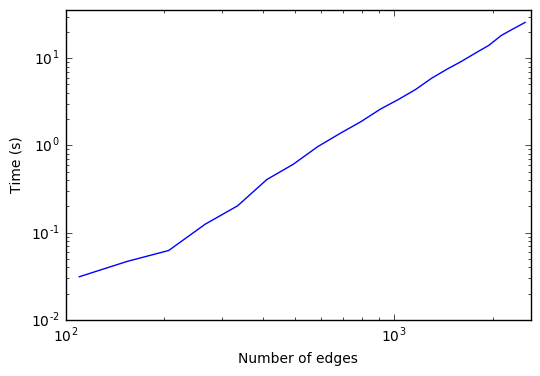

In [10]:
# use this cell to plot the time as a function of the number of edges (log-log scale)
fig,ax = plt.subplots()
ax.loglog()
ax.axis([100, numbers[-1]+100, 0.01, elapsedTime[-1]+10])
ax.set_xlabel('Number of edges')
ax.set_ylabel('Time (s)')
ax.plot(numbers,elapsedTime)

De curve in log-log schaal lijkt iets sneller dan lineair te schalen. Dit is logisch: de lineaire schaling komt omdat het aantal paden dat moet ingeslagen worden gelijk is aan het aantal edges. De rekentijd gaat echter iets sneller dan dit aantal paden de lucht in, en dat is door het aantal edges waaruit gekozen moet worden. In de grafen met meer edges, zal elke node ook gemiddeld meer edges hebben waaraan deze geconnecteerd is. De loop die voor elk pad checkt of het een brug is, zal dus ook langer duren.

## Graph coloring using six colors

Graph coloring is an optimization problem of assinging a color to each label using as few colors as possible such that no neighboring vertices have the same color.

The four color theorem states that a planar graph can be colored using only four colors.

We will use six colors (though we rarely need more than five) to color a planar graph. For this, the algorithm is very simple:

1. Color recursively with the six colors all vertices of degree five or more.
2. Color the rest of the graph with a free color.

**ASSIGNMENT 2**

1. Complete the graph coloring algorithm.
2. What do you think the time complexity of this algorithm is going to be (based on reasoning).

You can illustrate this algorithm on a Voronoi plot (a tesselation of a plane based on the distance to a set of points). Feel free to improve the graphics :-)

In [386]:
def graph_color(adj_list, colors=['k', 'r', 'b', 'g', 'y', 'm']):
    """
    Provides one of six colors for each vertex in a planar graph
    such that no neighboring vertices have the same color
    
    Inputs:
        - adj_list: adjecency list of a planar graph
        - colors: list of six colors (default those for matplotlib plotting)
        
    Output:
        - vertices_colors: a dict with a color for each vertex
    """    
    
    adj_list = {k : v.copy() for k, v in adj_list.items()}
    vertices_colors = {k : set() for k,v in adj_list.items()}
    others = []
    
    for vert,k in adj_list.items():
        if len(k) > 4:
            correctColors = set(colors)
            for v in k:
                correctColors -= vertices_colors[v]
            vertices_colors[vert] = set(list(correctColors)[0])
        else:
            others.append(vert)
            
    for vert in others:
        correctColors = set(colors)
        for v in adj_list[vert]:
            correctColors -= vertices_colors[v]
        vertices_colors[vert] = set([correctColors.pop()])   
    
    vertices_colors = {k: list(v) for k, v in vertices_colors.items()}
    return vertices_colors

In [373]:
colors=['k', 'r', 'b', 'g', 'y', 'm']

In [376]:
colors[min([colors.index(i) for i in list(correctColors)])]

'k'

In [350]:
from graphs import get_planar_graph

In [388]:
X = np.random.randn(20, 2)  # random points for Voronoi tesselation
planar_graph = get_planar_graph(X)
planar_graph

{0: {2, 4, 6, 7, 10, 16},
 1: {3, 7, 9, 12, 13, 15, 18},
 2: {0, 5, 7, 10, 18, 19},
 3: {1, 8, 12, 15, 17},
 4: {0, 6, 13, 15, 16},
 5: {2, 18, 19},
 6: {0, 4, 7, 13},
 7: {0, 1, 2, 6, 13, 18},
 8: {3, 10, 16, 17},
 9: {1, 11, 12, 18},
 10: {0, 2, 8, 11, 14, 16, 19},
 11: {9, 10, 14, 18, 19},
 12: {1, 3, 9},
 13: {1, 4, 6, 7, 15},
 14: {10, 11, 19},
 15: {1, 3, 4, 13, 16, 17},
 16: {0, 4, 8, 10, 15, 17},
 17: {3, 8, 15, 16},
 18: {1, 2, 5, 7, 9, 11, 19},
 19: {2, 5, 10, 11, 14, 18}}

In [389]:
coloring = graph_color(planar_graph, colors=['k', 'r', 'b', 'g', 'y', 'm'])
coloring

{0: ['y'],
 1: ['y'],
 2: ['r'],
 3: ['r'],
 4: ['r'],
 5: ['y'],
 6: ['b'],
 7: ['k'],
 8: ['y'],
 9: ['r'],
 10: ['k'],
 11: ['y'],
 12: ['k'],
 13: ['g'],
 14: ['r'],
 15: ['k'],
 16: ['g'],
 17: ['b'],
 18: ['g'],
 19: ['b']}

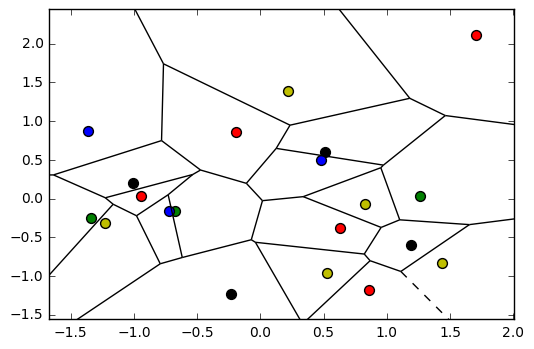

In [383]:
fig, ax = plt.subplots()

vor = Voronoi(X)

voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False)
for i, c in coloring.items():
    ax.scatter(X[i, 0], X[i, 1], c=c, s=50)

Time complexity: vermoedelijk (en bevestigd door enkele snelle testen met %timeit) zal de tijd complexiteit hier lineair zijn. De loop die gedaan wordt, wordt gewoon langer naar gelang er meer punten zijn om te overlopen. Voor de rest zal het gemiddelde aantal buren ook wat naar boven gaan naar alle waarschijnlijkheid, dus dit kan zorgen voor een (kleine) afwijking van de lineariteit.